**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "result.summary.fcc_peak_call.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)
colnames(dat)[1:5] = c("Chrom", "ChromStart", "ChromEnd", "Region", "Annotation")
dat_region_annot_fcc = dat
head(dat)

Chrom,ChromStart,ChromEnd,Region,Annotation,Label,Label2,Label3
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1,10038,10405,chr1:10038-10405,ASTARR,ASTARR_R,ASTARR_R,Repress (R)
chr1,16025,16338,chr1:16025-16338,ASTARR,ASTARR_R,ASTARR_R,Repress (R)
chr1,17288,17689,chr1:17288-17689,ASTARR,ASTARR_R,ASTARR_R,Repress (R)
chr1,28934,29499,chr1:28934-29499,ASTARR,ASTARR_R,ASTARR_R,Repress (R)
chr1,115429,115969,chr1:115429-115969,ASTARR,ASTARR_A,ASTARR_A,Active (A)
chr1,136201,137353,chr1:136201-137353,ASTARR,ASTARR_R,ASTARR_R,Repress (R)


In [3]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "result.summary.connectivity.loop.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_annot_loop = dat
head(dat)

Chrom,ChromStart,ChromEnd,Region,Count,Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
chr1,778233,779389,chr1:778233-779389,1,#Loop == 1
chr1,826796,828040,chr1:826796-828040,1,#Loop == 1
chr1,869637,870233,chr1:869637-870233,4,#Loop == 4
chr1,903783,905204,chr1:903783-905204,5,#Loop == 5
chr1,906659,907222,chr1:906659-907222,3,#Loop == 3
chr1,920937,921509,chr1:920937-921509,2,#Loop == 2


In [4]:
txt_region = "fcc_astarr_macs_input_overlap"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc", txt_region, "summary")
#txt_fname  = "result.coverage.zscore.share.tsv"
txt_fname  = "result.coverage.zscore.total.tsv"
txt_fpath  = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)
dat_zscore_fcc = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 732586      9


Chrom,ChromStart,ChromEnd,Region,Score,Assay_Name,Assay_Type,Assay_Group,Assay_Label
chr10,100729094,100729750,chr10:100729094-100729750,-0.3065107,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr10,100743501,100744571,chr10:100743501-100744571,-0.2702473,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr10,100745413,100745741,chr10:100745413-100745741,0.1130381,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH


In [5]:
vec_txt_group = c(
    "ASTARR_KS91", 
    "WSTARR",
    "TMPRA",
    "LMPRA",
    "CRISPRi-HCRFF",
    "CRISPRi-Growth"
)
dat = dat_zscore_fcc
dat = dat %>% dplyr::filter(Assay_Group %in% vec_txt_group)

dat_zscore_fcc_subset = dat
print(dim(dat))
print(table(dat$Assay_Group))
fun_display_table(head(dat))

[1] 432505      9

   ASTARR_KS91 CRISPRi-Growth  CRISPRi-HCRFF          LMPRA          TMPRA 
        150040          72743            941          61478            823 
        WSTARR 
        146480 


Chrom,ChromStart,ChromEnd,Region,Score,Assay_Name,Assay_Type,Assay_Group,Assay_Label
chr10,100729094,100729750,chr10:100729094-100729750,-0.3065107,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr10,100743501,100744571,chr10:100743501-100744571,-0.2702473,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr10,100745413,100745741,chr10:100745413-100745741,0.1130381,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr10,100827671,100829454,chr10:100827671-100829454,-0.2213059,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr11,4092109,4092511,chr11:4092109-4092511,-0.4462995,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr11,4094223,4095304,chr11:4094223-4095304,-0.2301690,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH


In [6]:
dat = dat_zscore_fcc
table(dat$Assay_Type, dat$Assay_Label)

                
                 ATAC-STARR CRISPRi-Growth CRISPRi-HCR FlowFISH Lenti-MPRA
  ASTARR             450121              0                    0          0
  CRISPRi-Growth          0          72743                    0          0
  CRISPRi-HCRFF           0              0                  941          0
  LMPRA                   0              0                    0      61478
  TMPRA                   0              0                    0          0
  WSTARR                  0              0                    0          0
                
                 Tiling-MPRA WHG-STARR
  ASTARR                   0         0
  CRISPRi-Growth           0         0
  CRISPRi-HCRFF            0         0
  LMPRA                    0         0
  TMPRA                  823         0
  WSTARR                   0    146480

In [7]:
dat = dat_zscore_fcc
table(dat$Assay_Group, dat$Assay_Label)

                
                 ATAC-STARR CRISPRi-Growth CRISPRi-HCR FlowFISH Lenti-MPRA
  ASTARR_KS274       150041              0                    0          0
  ASTARR_KS91        150040              0                    0          0
  ASTARR_KSMerge     150040              0                    0          0
  CRISPRi-Growth          0          72743                    0          0
  CRISPRi-HCRFF           0              0                  941          0
  LMPRA                   0              0                    0      61478
  TMPRA                   0              0                    0          0
  WSTARR                  0              0                    0          0
                
                 Tiling-MPRA WHG-STARR
  ASTARR_KS274             0         0
  ASTARR_KS91              0         0
  ASTARR_KSMerge           0         0
  CRISPRi-Growth           0         0
  CRISPRi-HCRFF            0         0
  LMPRA                    0         0
  TMPRA           

In [8]:
dat = dat_zscore_fcc
unique(dat$Assay_Group)

[1] "CRISPRi-HCRFF"  "CRISPRi-Growth" "LMPRA"          "TMPRA"         
[5] "ASTARR_KS274"   "ASTARR_KS91"    "ASTARR_KSMerge" "WSTARR"

In [9]:
dat = dat_zscore_fcc_subset
unique(dat$Assay_Group)

[1] "CRISPRi-HCRFF"  "CRISPRi-Growth" "LMPRA"          "TMPRA"         
[5] "ASTARR_KS91"    "WSTARR"

In [10]:
dat = dat_region_annot_loop
table(dat$Label)


 #Loop == 1 #Loop == 10 #Loop == 11 #Loop == 12 #Loop == 13 #Loop == 14 
      15471        1335        1066         793         558         371 
#Loop == 15 #Loop == 16 #Loop == 17 #Loop == 18 #Loop == 19  #Loop == 2 
        286         187         161          78          59        8104 
#Loop == 20 #Loop == 21 #Loop == 22 #Loop == 23 #Loop == 24 #Loop == 25 
         47          46          19          11          17           7 
#Loop == 26 #Loop == 27 #Loop == 28 #Loop == 29  #Loop == 3 #Loop == 31 
          7           5           1           2        5939           4 
#Loop == 32 #Loop == 33  #Loop == 4  #Loop == 5  #Loop == 6  #Loop == 7 
          3           1        4710        4029        3342        2877 
 #Loop == 8  #Loop == 9 
       2359        1865 

In [13]:
dat = dat_region_annot_fcc
table(dat$Annotation)


        ASTARR CRISPRi-Growth  CRISPRi-HCRFF          LMPRA          TMPRA 
         99884          73243             56          20937            860 
        WSTARR 
         30181 

In [14]:
dat = dat_region_annot_fcc
table(dat$Label)


             ASTARR_A              ASTARR_R CRISPRi-Growth:Signif 
                26161                 73723                 73243 
   CRISPRi-HCRFF:CASA               LMPRA_A               LMPRA_R 
                   56                 20692                   245 
              TMPRA_A               TMPRA_R              WSTARR_A 
                  847                    13                 26992 
             WSTARR_R 
                 3189 

In [15]:
dat = dat_region_annot_fcc
table(dat$Label2)


             ASTARR_A     ASTARR_A,ASTARR_R              ASTARR_R 
                17042                 18238                 64604 
CRISPRi-Growth:Signif    CRISPRi-HCRFF:CASA               LMPRA_A 
                73243                    56                 20660 
      LMPRA_A,LMPRA_R               LMPRA_R               TMPRA_A 
                   64                   213                   835 
      TMPRA_A,TMPRA_R               TMPRA_R              WSTARR_A 
                   24                     1                 26140 
    WSTARR_A,WSTARR_R              WSTARR_R 
                 1704                  2337 

In [16]:
dat = dat_region_annot_fcc
table(dat$Label3)


 Active (A) Repress (R) Significant 
      74692       77170       73299 

## Merge

In [11]:
dat = dat_zscore_fcc
fun_display_table(head(dat, 3))

Chrom,ChromStart,ChromEnd,Region,Score,Assay_Name,Assay_Type,Assay_Group,Assay_Label
chr10,100729094,100729750,chr10:100729094-100729750,-0.3065107,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr10,100743501,100744571,chr10:100743501-100744571,-0.2702473,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr10,100745413,100745741,chr10:100745413-100745741,0.1130381,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH


In [12]:
dat = dat_region_annot_loop
fun_display_table(head(dat, 3))

Chrom,ChromStart,ChromEnd,Region,Count,Label
chr1,778233,779389,chr1:778233-779389,1,#Loop == 1
chr1,826796,828040,chr1:826796-828040,1,#Loop == 1
chr1,869637,870233,chr1:869637-870233,4,#Loop == 4


In [13]:
dat = dat_region_annot_fcc
fun_display_table(head(dat, 3))

Chrom,ChromStart,ChromEnd,Region,Annotation,Label,Label2,Label3
chr1,10038,10405,chr1:10038-10405,ASTARR,ASTARR_R,ASTARR_R,Repress (R)
chr1,16025,16338,chr1:16025-16338,ASTARR,ASTARR_R,ASTARR_R,Repress (R)
chr1,17288,17689,chr1:17288-17689,ASTARR,ASTARR_R,ASTARR_R,Repress (R)


In [14]:
vec = c("Chrom", "ChromStart", "ChromEnd", "Region")

tmp = c(vec, "Score", "Assay_Type", "Assay_Label")
dat = dat_zscore_fcc
dat = dat %>% 
    dplyr::select({{tmp}}) %>%
    dplyr::distinct()
df1 = dat

tmp = c(vec, "Assay_Type", "Label_FCC")
dat = dat_region_annot_fcc
dat = dat %>% 
    dplyr::mutate(
        Assay_Type = Annotation,
        Label_FCC  = Label3
    ) %>% 
    dplyr::select({{tmp}}) %>%
    dplyr::distinct()
df2 = dat

tmp = c(vec, "Label_Loop", "Count_Loop")
dat = dat_region_annot_loop
dat = dat %>% 
    dplyr::mutate(
        Count_Loop = Count,
        Label_Loop = Label
    ) %>% 
    dplyr::select({{tmp}}) %>%
    dplyr::distinct()
df3 = dat

In [15]:
print(table(df1$Assay_Type))
head(df1, 3)


        ASTARR CRISPRi-Growth  CRISPRi-HCRFF          LMPRA          TMPRA 
        450121          72743            941          61478            823 
        WSTARR 
        146480 


Chrom,ChromStart,ChromEnd,Region,Score,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
chr10,100729094,100729750,chr10:100729094-100729750,-0.3065107,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr10,100743501,100744571,chr10:100743501-100744571,-0.2702473,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr10,100745413,100745741,chr10:100745413-100745741,0.1130381,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH


In [16]:
print(table(df2$Assay_Type))
print(table(df2$Label_FCC))
head(df2, 3)


        ASTARR CRISPRi-Growth  CRISPRi-HCRFF          LMPRA          TMPRA 
         99884          73243             56          20937            860 
        WSTARR 
         30181 

 Active (A) Repress (R) Significant 
      74692       77170       73299 


Chrom,ChromStart,ChromEnd,Region,Assay_Type,Label_FCC
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,10038,10405,chr1:10038-10405,ASTARR,Repress (R)
chr1,16025,16338,chr1:16025-16338,ASTARR,Repress (R)
chr1,17288,17689,chr1:17288-17689,ASTARR,Repress (R)


In [17]:
head(df3, 3)

Chrom,ChromStart,ChromEnd,Region,Label_Loop,Count_Loop
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
chr1,778233,779389,chr1:778233-779389,#Loop == 1,1
chr1,826796,828040,chr1:826796-828040,#Loop == 1,1
chr1,869637,870233,chr1:869637-870233,#Loop == 4,4


In [18]:
tmp = c(vec, "Assay_Type")
dat = df1 %>% dplyr::left_join(df2, by = tmp, relationship = "many-to-many")

tmp = vec
dat = dat %>% dplyr::left_join(df3, by = tmp, relationship = "many-to-many")

dat = dat %>% dplyr::mutate(
    Count_Loop = ifelse(is.na(Count_Loop), 0,            Count_Loop),
    Label_Loop = ifelse(is.na(Label_Loop), "#Loop == 0", Label_Loop),
    Label_FCC  = ifelse(is.na(Label_FCC),  "Not Signif", Label_FCC)
)

dat_merge = dat
print(dim(dat))
head(dat, 3)

[1] 760828     10


Chrom,ChromStart,ChromEnd,Region,Score,Assay_Type,Assay_Label,Label_FCC,Label_Loop,Count_Loop
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
chr10,100729094,100729750,chr10:100729094-100729750,-0.3065107,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,Not Signif,#Loop == 3,3
chr10,100743501,100744571,chr10:100743501-100744571,-0.2702473,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,Not Signif,#Loop == 7,7
chr10,100745413,100745741,chr10:100745413-100745741,0.1130381,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,Not Signif,#Loop == 0,0


In [19]:
table(dat$Count_Loop, useNA = "always")


     0      1      2      3      4      5      6      7      8      9     10 
448748  81098  45799  34835  28457  24631  20651  17872  14643  11629   8408 
    11     12     13     14     15     16     17     18     19     20     21 
  6755   5016   3592   2430   1882   1287   1040    508    381    302    331 
    22     23     24     25     26     27     28     29     31     32     33 
   128     76    109     51     57     32      9     18     26     21      6 
  <NA> 
     0 

In [20]:
table(dat$Label_Loop, useNA = "always")


 #Loop == 0  #Loop == 1 #Loop == 10 #Loop == 11 #Loop == 12 #Loop == 13 
     448748       81098        8408        6755        5016        3592 
#Loop == 14 #Loop == 15 #Loop == 16 #Loop == 17 #Loop == 18 #Loop == 19 
       2430        1882        1287        1040         508         381 
 #Loop == 2 #Loop == 20 #Loop == 21 #Loop == 22 #Loop == 23 #Loop == 24 
      45799         302         331         128          76         109 
#Loop == 25 #Loop == 26 #Loop == 27 #Loop == 28 #Loop == 29  #Loop == 3 
         51          57          32           9          18       34835 
#Loop == 31 #Loop == 32 #Loop == 33  #Loop == 4  #Loop == 5  #Loop == 6 
         26          21           6       28457       24631       20651 
 #Loop == 7  #Loop == 8  #Loop == 9        <NA> 
      17872       14643       11629           0 

In [21]:
table(dat$Label_FCC, useNA = "always")


 Active (A)  Not Signif Repress (R) Significant        <NA> 
     126519      336934      224598       72777           0 

In [24]:
dat = dat_merge
head(dat)

Chrom,ChromStart,ChromEnd,Region,Score,Assay_Type,Assay_Label,Label_FCC,Label_Loop,Count_Loop
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
chr10,100729094,100729750,chr10:100729094-100729750,-0.3065107,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,Not Signif,#Loop == 3,3
chr10,100743501,100744571,chr10:100743501-100744571,-0.2702473,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,Not Signif,#Loop == 7,7
chr10,100745413,100745741,chr10:100745413-100745741,0.1130381,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,Not Signif,#Loop == 0,0
chr10,100827671,100829454,chr10:100827671-100829454,-0.2213059,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,Not Signif,#Loop == 1,1
chr11,4092109,4092511,chr11:4092109-4092511,-0.4462995,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,Not Signif,#Loop == 1,1
chr11,4094223,4095304,chr11:4094223-4095304,-0.2301690,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,Not Signif,#Loop == 3,3


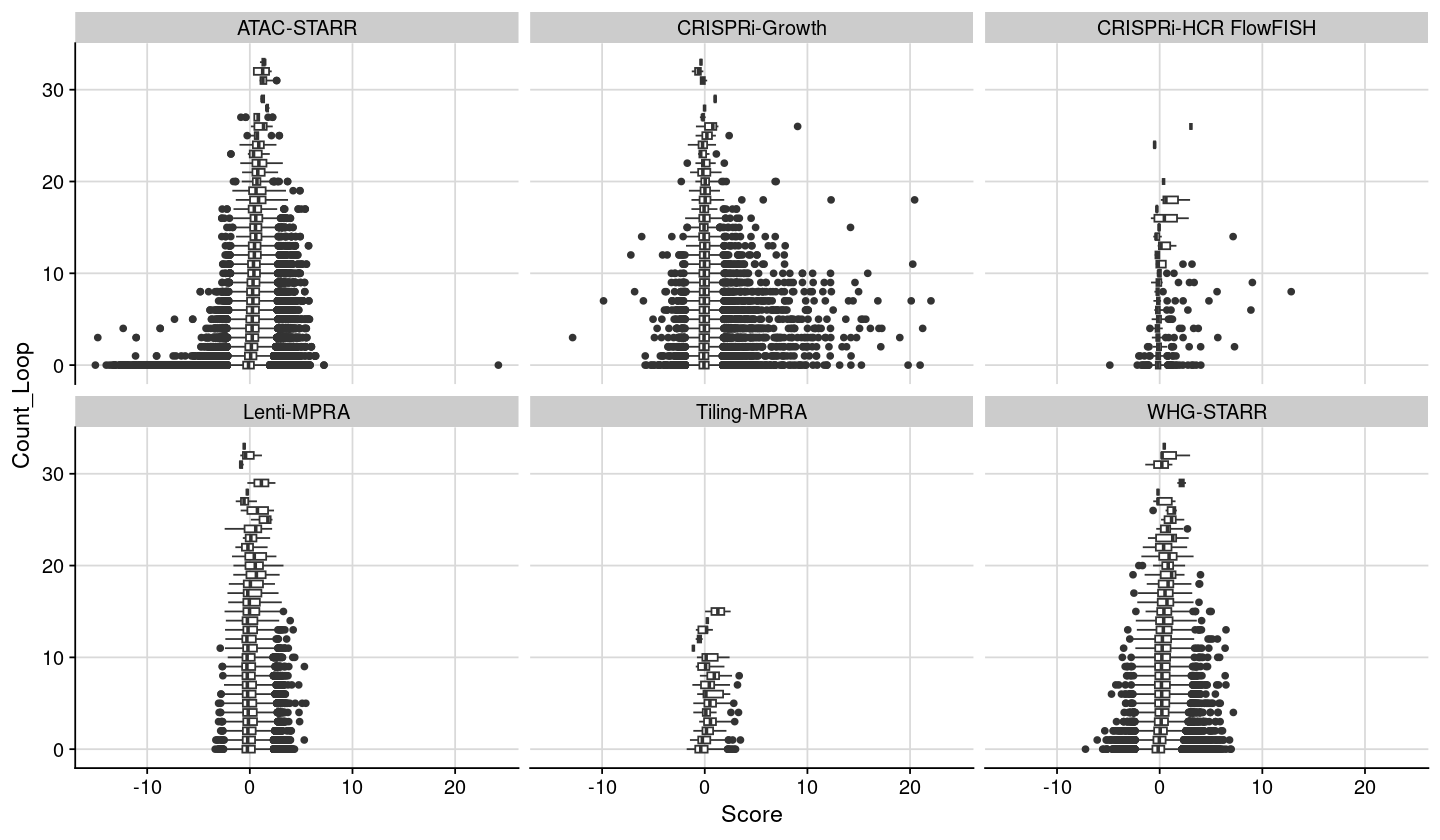

In [29]:
dat = dat_merge
dat = dat %>% 
    dplyr::select(Region, Score, Label_Loop, Count_Loop, Assay_Label) %>% 
    dplyr::distinct()

gpt = ggplot(dat, aes(x=Score, y=Count_Loop, group=Label_Loop)) + 
    geom_boxplot() + 
    theme_cowplot() + 
    background_grid() +
    facet_wrap(~Assay_Label)

options(repr.plot.height=7, repr.plot.width=12)
print(gpt)

In [33]:
dat = dat_merge
head(dat)

Chrom,ChromStart,ChromEnd,Region,Score,Assay_Type,Assay_Label,Label_FCC,Label_Loop,Count_Loop
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
chr10,100729094,100729750,chr10:100729094-100729750,-0.3065107,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,Not Signif,#Loop == 3,3
chr10,100743501,100744571,chr10:100743501-100744571,-0.2702473,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,Not Signif,#Loop == 7,7
chr10,100745413,100745741,chr10:100745413-100745741,0.1130381,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,Not Signif,#Loop == 0,0
chr10,100827671,100829454,chr10:100827671-100829454,-0.2213059,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,Not Signif,#Loop == 1,1
chr11,4092109,4092511,chr11:4092109-4092511,-0.4462995,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,Not Signif,#Loop == 1,1
chr11,4094223,4095304,chr11:4094223-4095304,-0.2301690,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH,Not Signif,#Loop == 3,3


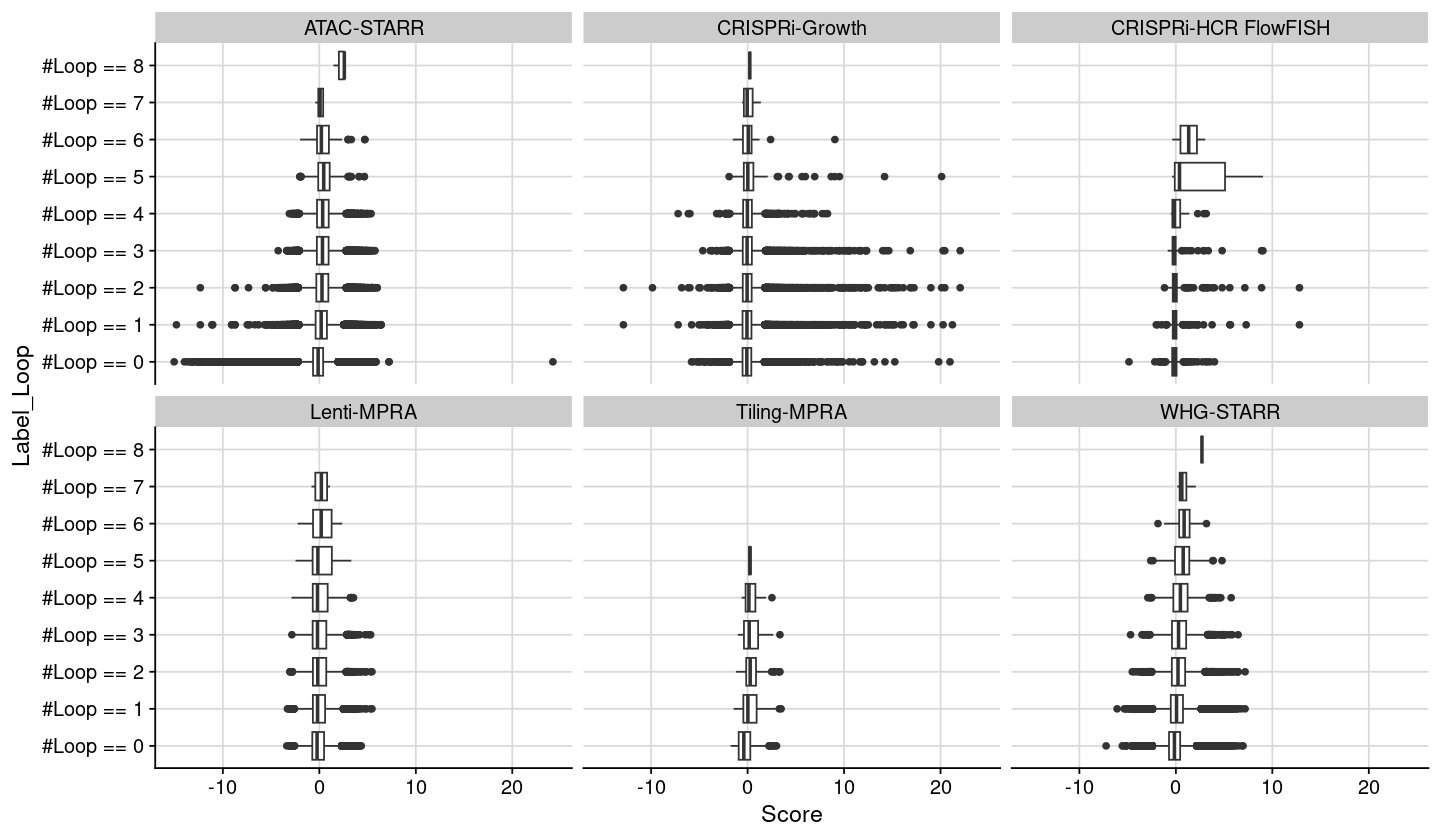

In [30]:
dat = dat_merge
dat = dat %>% 
    dplyr::select(Region, Score, Label_Loop, Assay_Label) %>% 
    dplyr::distinct()

gpt = ggplot(dat, aes(x=Score, y=Label_Loop)) + 
    geom_boxplot() + 
    theme_cowplot() + 
    background_grid() +
    facet_wrap(~Assay_Label)

options(repr.plot.height=7, repr.plot.width=12)
print(gpt)

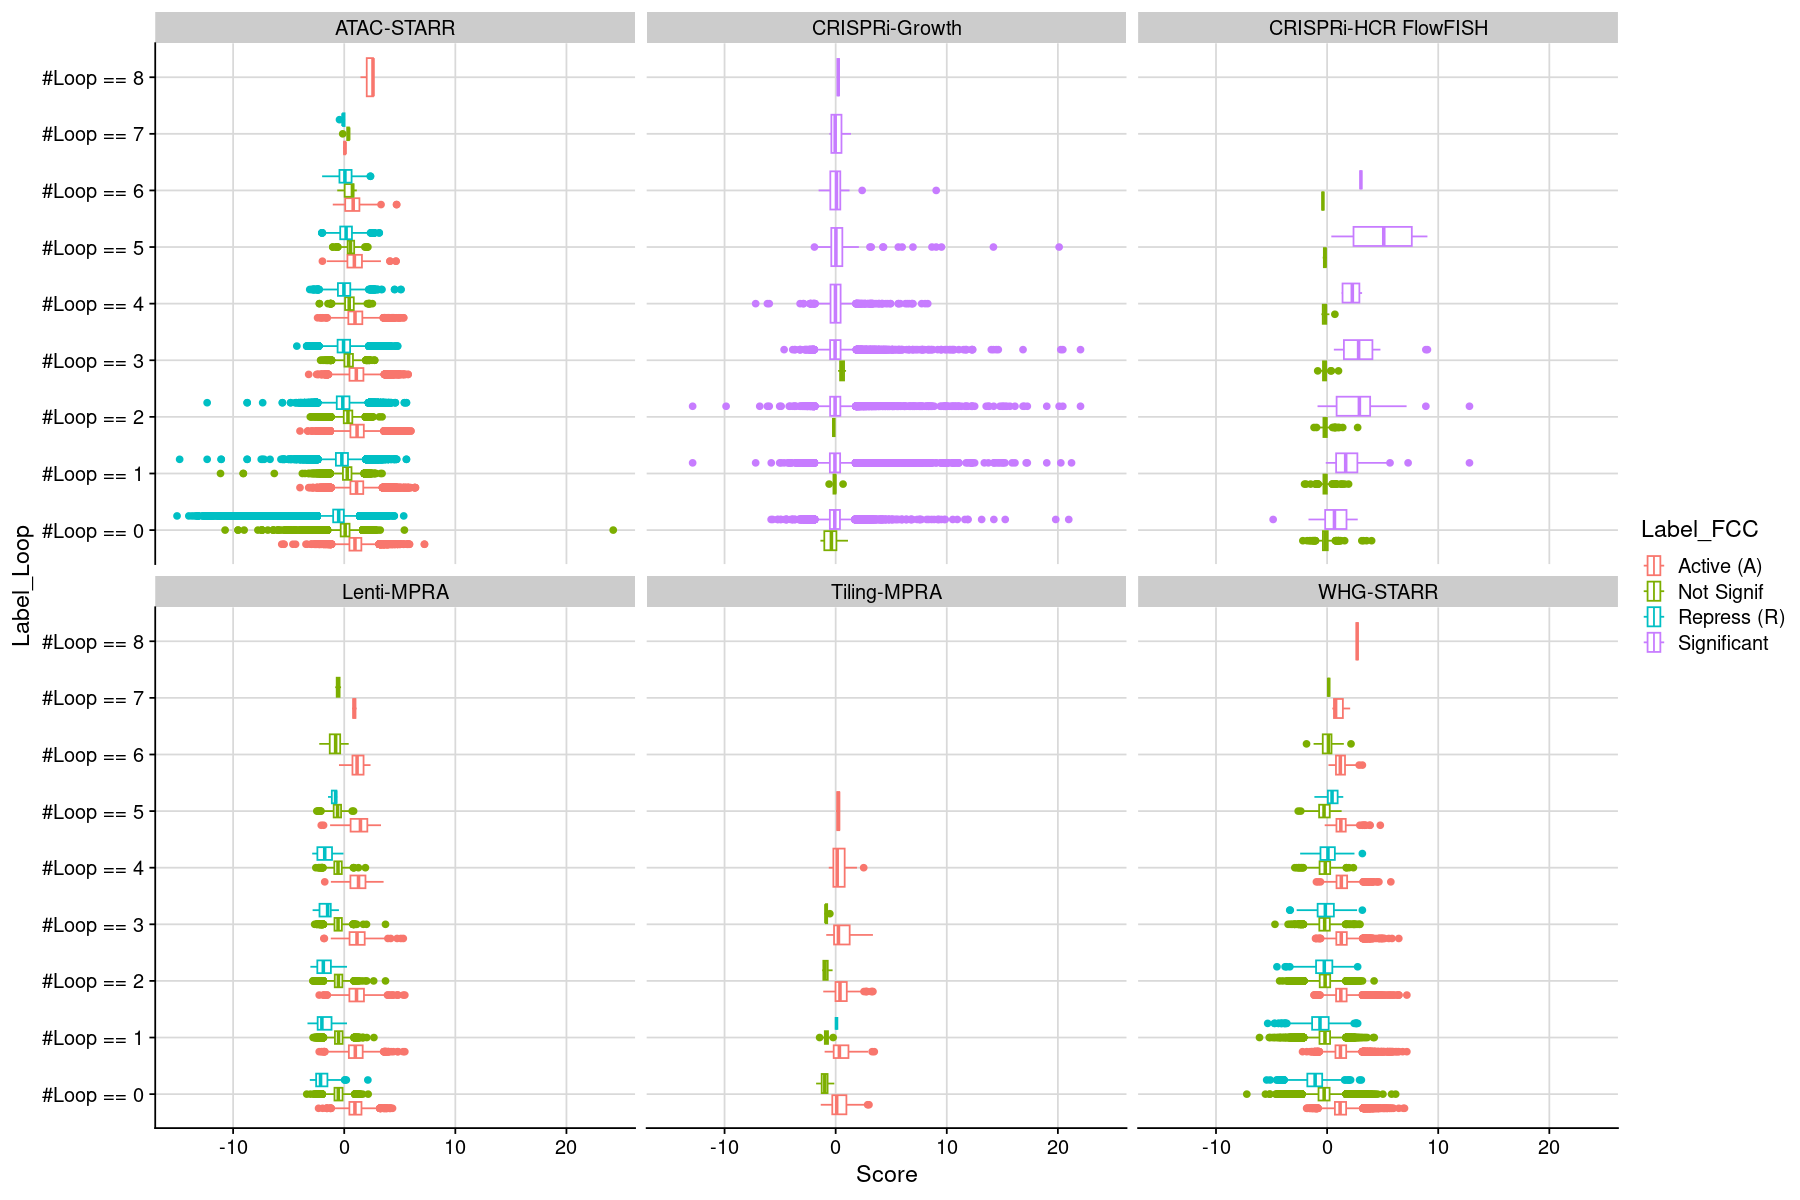

In [31]:
dat = dat_merge
dat = dat %>% 
    dplyr::select(Region, Score, Label_FCC, Label_Loop, Assay_Label) %>% 
    dplyr::distinct()

gpt = ggplot(dat, aes(x=Score, y=Label_Loop, color = Label_FCC)) + 
    geom_boxplot() + 
    theme_cowplot() + 
    background_grid() +
    facet_wrap(~Assay_Label)

options(repr.plot.height=10, repr.plot.width=15)
print(gpt)

In [33]:
0:5

[1] 0 1 2 3 4 5

In [41]:
vec1 = 0:10
vec2 = 0:4

num  = length(vec1) - length(vec2)
vec3 = c(
    paste("#Loop ==", vec2),
    rep("#Loop > 4",  num)
)

fun = function(txt){
    res = fun_str_map_match(txt, vec1, vec3)
    return(res)
}
tibble(vec1, vec3)

vec1,vec3
<int>,<chr>
0,#Loop == 0
1,#Loop == 1
2,#Loop == 2
3,#Loop == 3
4,#Loop == 4
5,#Loop > 4
6,#Loop > 4
7,#Loop > 4
8,#Loop > 4


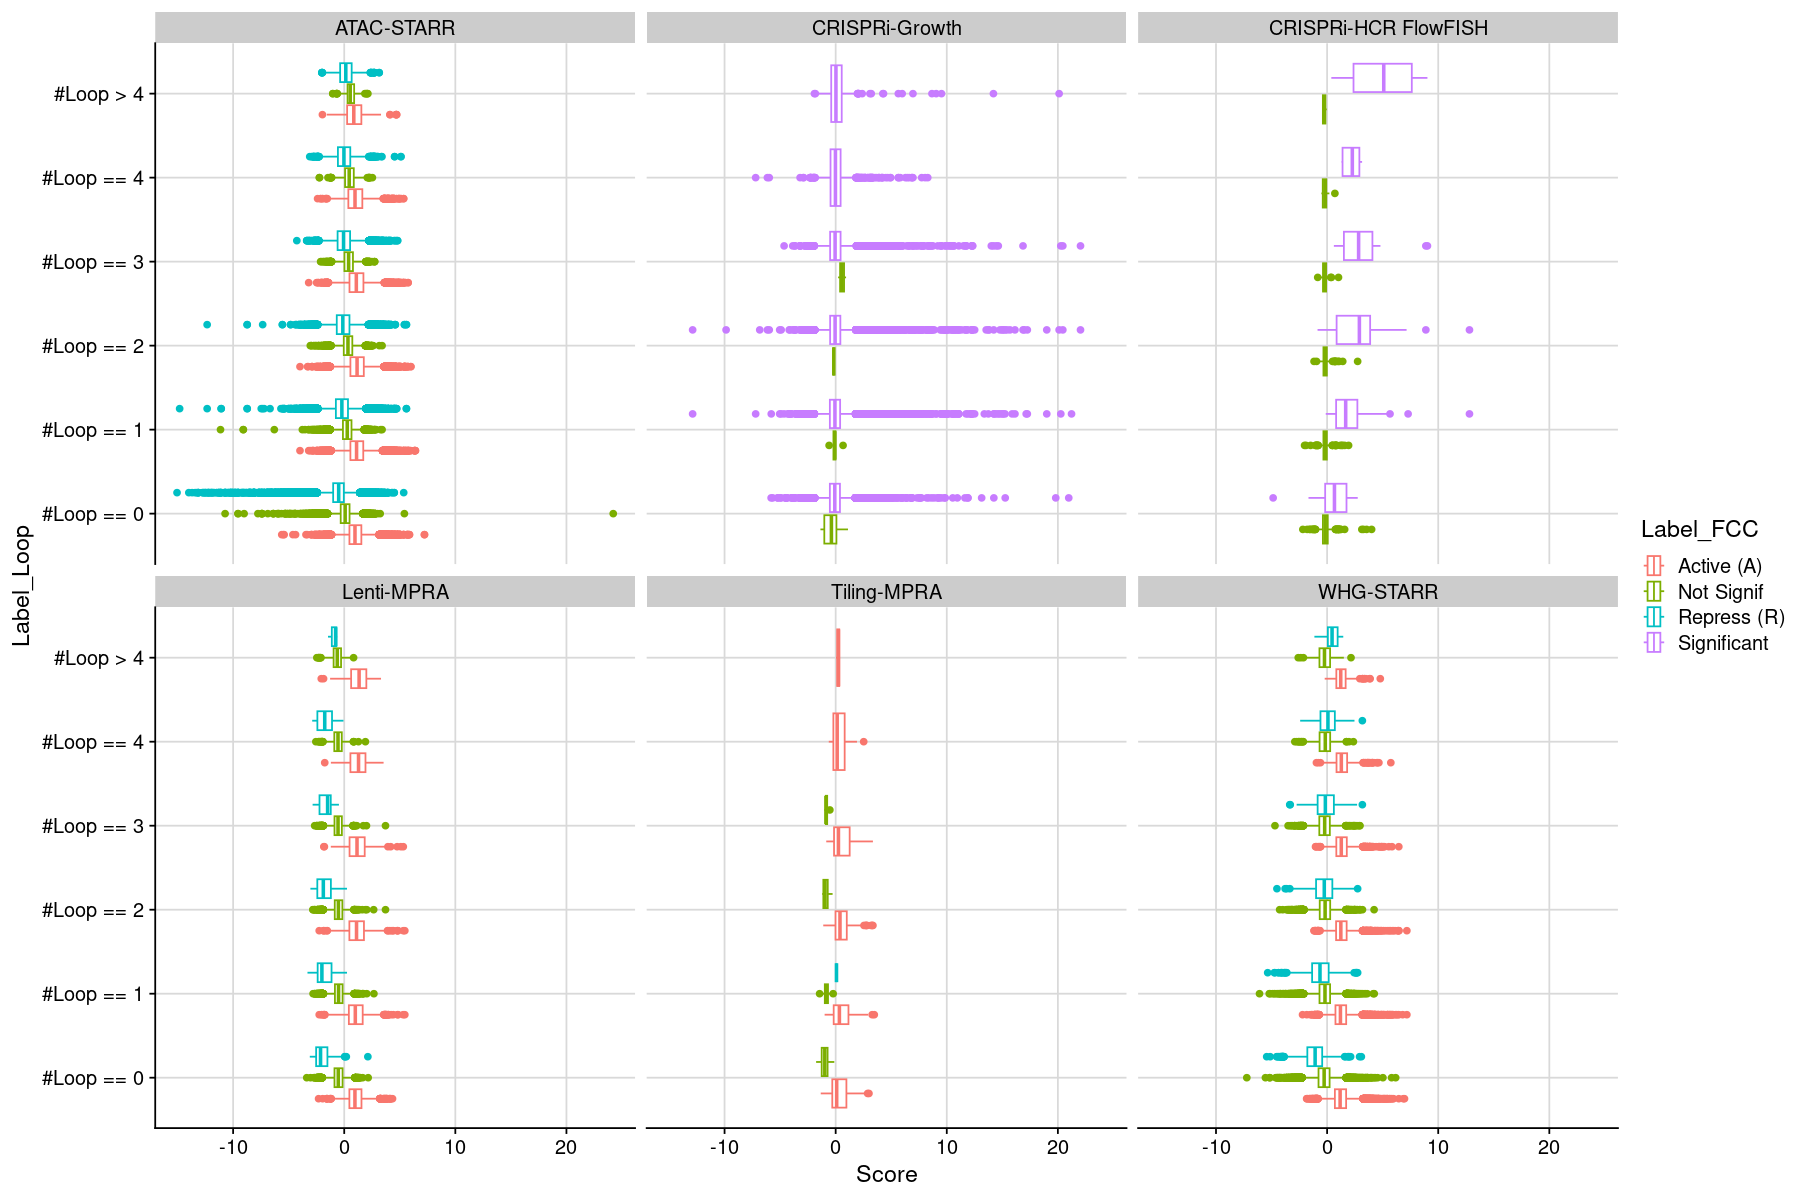

In [42]:
dat = dat_merge
dat = dat %>% dplyr::mutate(Label_Loop = fun(Count_Loop))

dat = dat %>% 
    dplyr::select(Region, Score, Label_FCC, Label_Loop, Assay_Label) %>% 
    dplyr::distinct()

gpt = ggplot(dat, aes(x=Score, y=Label_Loop, color = Label_FCC)) + 
    geom_boxplot() + 
    theme_cowplot() + 
    background_grid() +
    facet_wrap(~Assay_Label)

options(repr.plot.height=10, repr.plot.width=15)
print(gpt)

Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”
Warning message:
“Groups with fewer than two datapoints have been drop

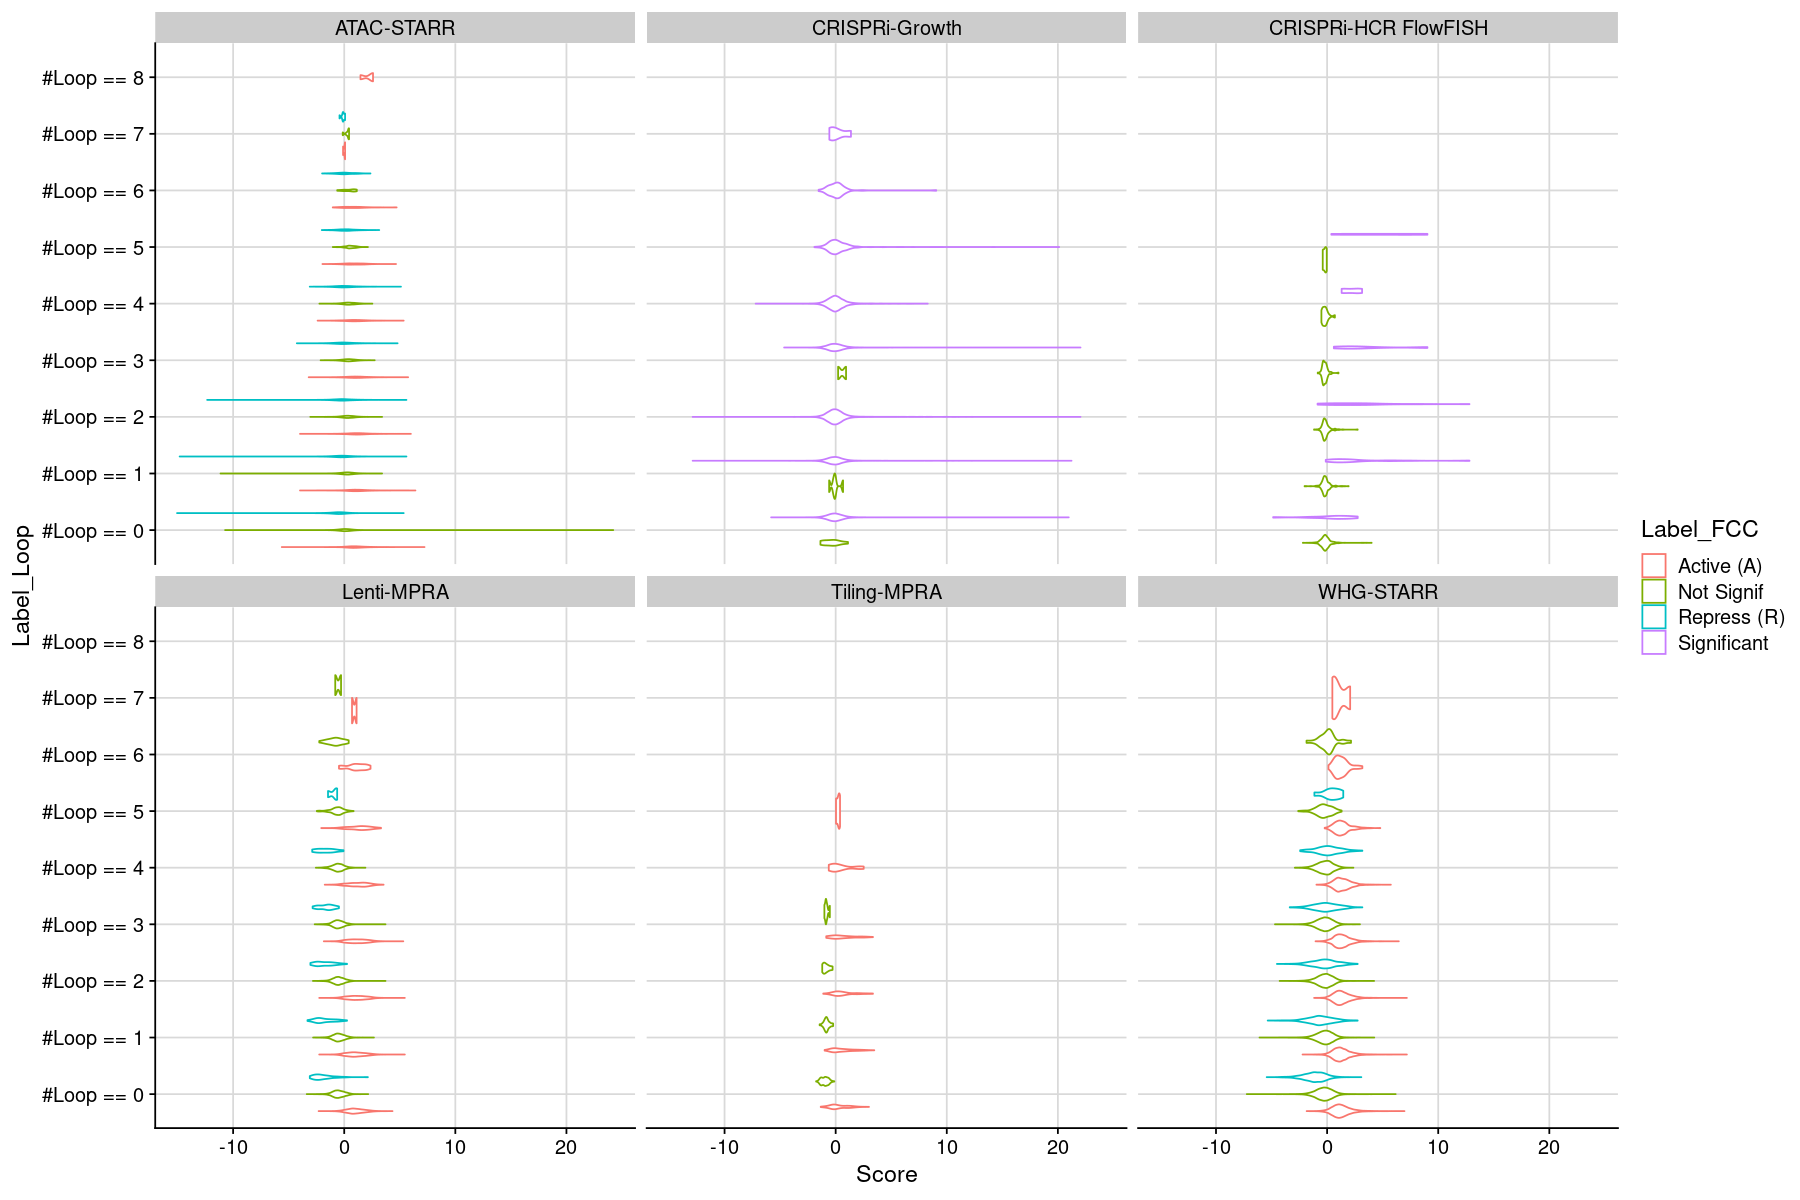

In [38]:
dat = dat_merge
dat = dat %>% 
    dplyr::select(Region, Score, Label_FCC, Label_Loop, Assay_Label) %>% 
    dplyr::distinct()

gpt = ggplot(dat, aes(x=Score, y=Label_Loop, color = Label_FCC)) + 
    geom_violin() + 
    theme_cowplot() + 
    background_grid() +
    facet_wrap(~Assay_Label)

options(repr.plot.height=10, repr.plot.width=15)
print(gpt)

In [ ]:
fun_bstrap_interveral = function(vec_num, fun = `mean`, num_iteration = 1000, num_seed = 123){
    ### init
    set.seed(num_seed)
    
    ### column: num_iteraction
    ### row:    length(vec_num)
    mat = replicate(
        num_iteration,
        sample(vec_num, replace = TRUE)
    )

    vec = apply(mat, 2, fun)
    res = quantile(vec, probs = c(0, 0.025, 0.25, 0.5, 0.75, 0.975, 1))
    res = c(res, mean(vec))
    names(res) = c("Min", "Ci95_Lw", "Q1", "Q2", "Q3", "Ci95_Up", "Max", "Mean")
    return(res)
}

## Merge FCC peaks

In [ ]:
dat = dat_zscore_fcc_subset
dat = dat %>% 
    dplyr::mutate(Assay = Assay_Type) %>%
    dplyr::select(Chrom, ChromStart, ChromEnd, Region, Score, Assay, Label_Loop)
head(dat)

In [22]:
vec = c("ASTARR", "WSTARR", "TMPRA", "LMPRA")
vec = c(paste(vec, "A", sep = "_"), paste(vec, "R", sep = "_"))
dat = dat_region_annot_fcc
dat = dat %>% 
    dplyr::filter(Label_B %in% vec) %>% 
    dplyr::mutate(Group_FCC = Group_B, Label_FCC = Label_B) %>%
    dplyr::select(Chrom, ChromStart, ChromEnd, Region, Group_FCC, Label_FCC) %>%
    dplyr::distinct()

dat_region_annot_fcc_arrange = dat
head(dat)

ERROR: [1m[33mError[39m in `dplyr::filter()`:[22m
[1m[22m[36mℹ[39m In argument: `Label_B %in% vec`.
[1mCaused by error:[22m
[33m![39m object 'Label_B' not found


In [26]:
dat = dat_zscore_share
dat = dat %>% dplyr::select(Chrom, ChromStart, ChromEnd, Region, Score, Assay, Label_Loop
dat = dplyr::left_join(
    , 
    dat_region_annot_loop, 
    by = c("Chrom", "ChromStart", "ChromEnd", "Region"))

dat = dat %>% 
    dplyr::mutate(
        Count_Loop = ifelse(is.na(Count), 0,            Count),
        Label_Loop = ifelse(is.na(Label), "#Loop == 0", Label)
    ) %>%
    dplyr::select(Chrom, ChromStart, ChromEnd, Region, Score, Assay, Label_Loop)


dat_merge = dat
head(dat)

Chrom,ChromStart,ChromEnd,Region,Score,Assay,Label_Loop
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
chr10,100729094,100729750,chr10:100729094-100729750,-0.3065107,CRISPRi-HCR FlowFISH,#Loop == 1
chr10,100743501,100744571,chr10:100743501-100744571,-0.2702473,CRISPRi-HCR FlowFISH,#Loop == 3
chr10,100745413,100745741,chr10:100745413-100745741,0.1130381,CRISPRi-HCR FlowFISH,#Loop == 0
chr10,100827671,100829454,chr10:100827671-100829454,-0.2213059,CRISPRi-HCR FlowFISH,#Loop == 1
chr11,4092109,4092511,chr11:4092109-4092511,-0.4462995,CRISPRi-HCR FlowFISH,#Loop == 1
chr11,4094223,4095304,chr11:4094223-4095304,-0.2301690,CRISPRi-HCR FlowFISH,#Loop == 3


In [27]:
table(dat$Assay)


          ATAC-STARR       CRISPRi-Growth CRISPRi-HCR FlowFISH 
              150040                72743                  941 
          Lenti-MPRA          Tiling-MPRA            WHG-STARR 
               61478                  823               146480 

## Merge FCC and Loop

In [11]:
dat = dplyr::left_join(
    dat_zscore_share, 
    dat_region_annot_loop, 
    by = c("Chrom", "ChromStart", "ChromEnd", "Region"))

dat = dat %>% dplyr::mutate(
    Count = ifelse(is.na(Count), 0,            Count),
    Label = ifelse(is.na(Label), "#Loop == 0", Label)
)
dat_merge = dat
head(dat)

Chrom,ChromStart,ChromEnd,Region,Score,Assay,Annotation,Count,Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
chr10,100729094,100729750,chr10:100729094-100729750,-0.3065107,CRISPRi-HCR FlowFISH,fcc_astarr_macs_input_overlap,1,#Loop == 1
chr10,100743501,100744571,chr10:100743501-100744571,-0.2702473,CRISPRi-HCR FlowFISH,fcc_astarr_macs_input_overlap,3,#Loop == 3
chr10,100745413,100745741,chr10:100745413-100745741,0.1130381,CRISPRi-HCR FlowFISH,NA,0,#Loop == 0
chr10,100827671,100829454,chr10:100827671-100829454,-0.2213059,CRISPRi-HCR FlowFISH,fcc_astarr_macs_input_overlap,1,#Loop == 1
chr11,4092109,4092511,chr11:4092109-4092511,-0.4462995,CRISPRi-HCR FlowFISH,fcc_astarr_macs_input_overlap,1,#Loop == 1
chr11,4094223,4095304,chr11:4094223-4095304,-0.2301690,CRISPRi-HCR FlowFISH,fcc_astarr_macs_input_overlap,3,#Loop == 3


In [15]:
dat = dat_merge
dat = dat %>% dplyr::select(Region, Label) %>% dplyr::distinct()
table(dat$Label)


#Loop == 0 #Loop == 1 #Loop == 2 #Loop == 3  #Loop > 3 
     96281      23728      15329       9874       4829 

In [21]:
geom_flat_violin

ERROR: Error in eval(expr, envir, enclos): object 'geom_flat_violin' not found


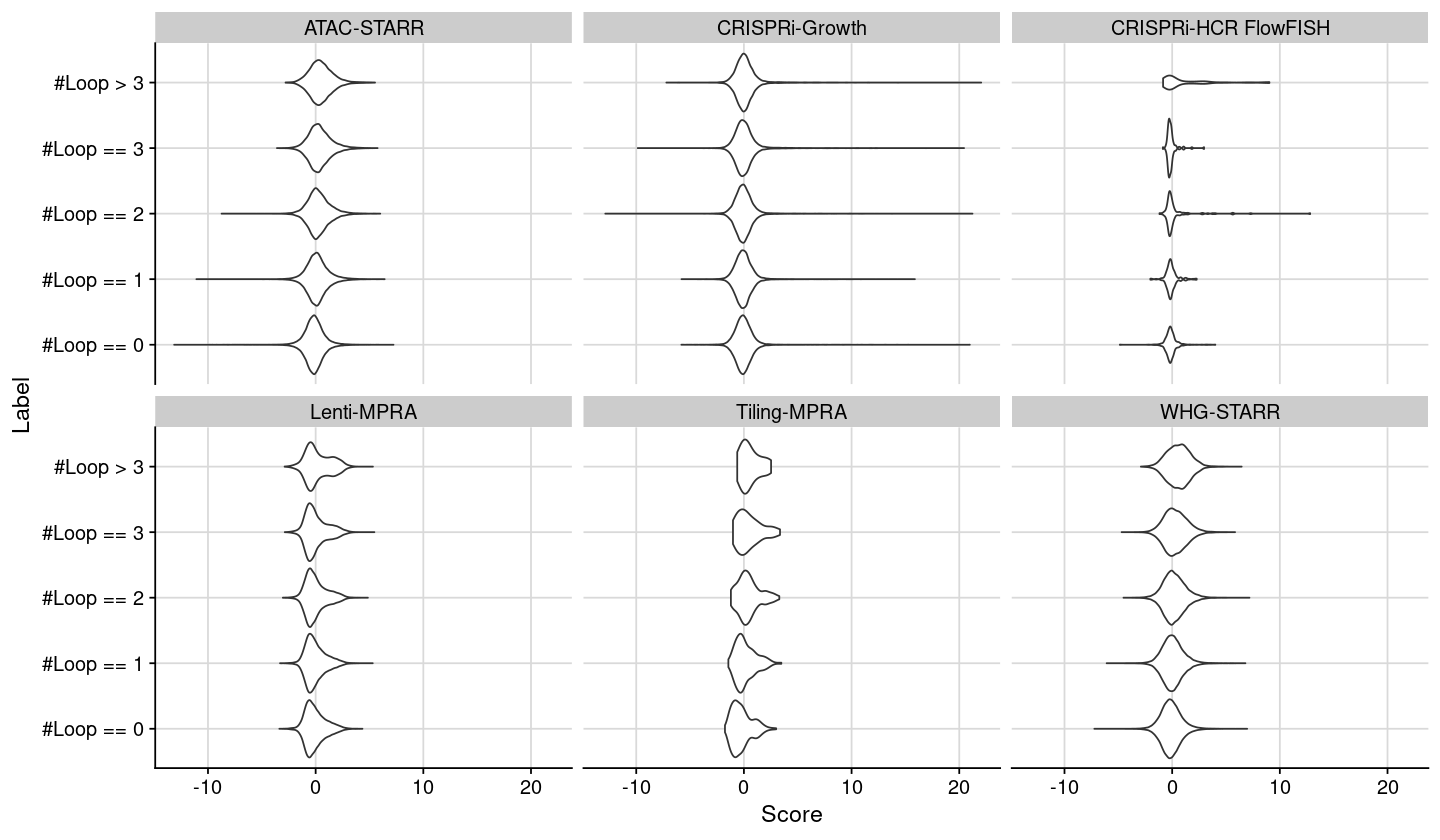

In [25]:
dat = dat_merge
gpt = ggplot(dat, aes(x=Score, y=Label)) + 
    geom_violin() + 
    theme_cowplot() + 
    background_grid() +
    facet_wrap(~Assay)
options(repr.plot.height=7, repr.plot.width=12)
print(gpt)

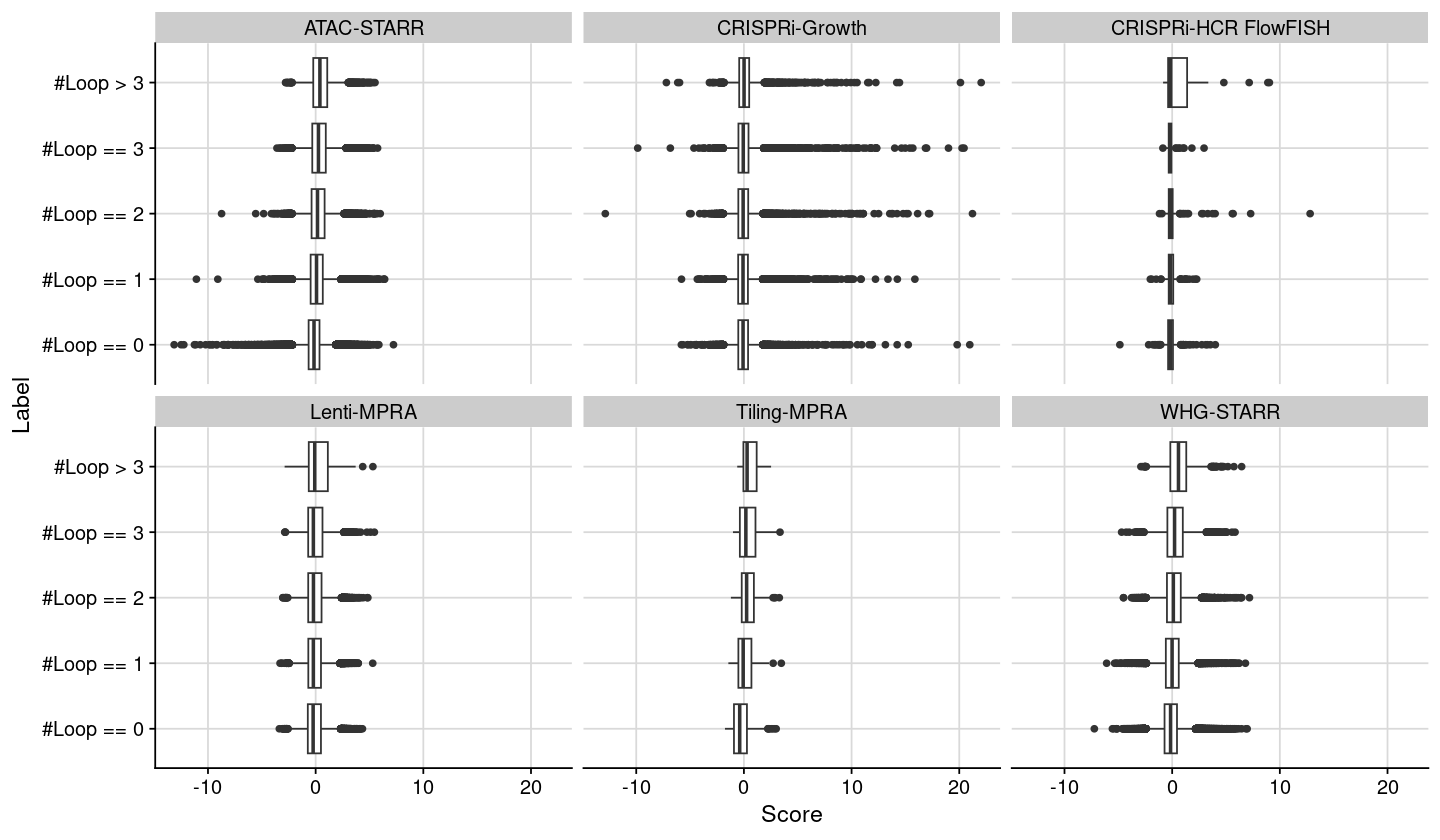

In [24]:
dat = dat_merge
gpt = ggplot(dat, aes(x=Score, y=Label)) + 
    geom_boxplot() + 
    theme_cowplot() + 
    background_grid() +
    facet_wrap(~Assay)
options(repr.plot.height=7, repr.plot.width=12)
print(gpt)

In [27]:
dat = dat_region_annot
table(dat$Label)


#Loop == 1 #Loop == 2 #Loop == 3  #Loop > 3 
     23728      15329       9874       4829 

In [35]:
dat = dat_merge
dat = dat %>% dplyr::select(Region, Count, Label) %>% dplyr::distinct()
dat = as.data.frame(table(dat$Count))
colnames(dat) = c("Label", "Count")

dat = dat %>% dplyr::mutate(Label = paste("#Loop ==", Label))
fun_display_table(dat)

Label,Count
#Loop == 0,96281
#Loop == 1,23728
#Loop == 2,15329
#Loop == 3,9874
#Loop == 4,3688
#Loop == 5,907
#Loop == 6,198
#Loop == 7,27
#Loop == 8,8
#Loop == 9,1
